# Grafo Unidades Nutricionais por rede de Fast Food 

Criação do grafo usando Networkx

In [8]:
import pandas as pd
import networkx as nx

#import plotly.offline as py
#import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fastfood.csv", index_col="name")

In [3]:
soma_list,nutri = [],[]

for nutriente in df.columns[0:len(df.columns)-2]: #para cada nutriente no dataframe (-2 para excluir "categoria" e "rede")
    soma_list.append(df[nutriente].sum()) #soma os valores totais 
    nutri.append(nutriente) #guardamos o nome do nutriente

soma_list = pd.Series(soma_list)
  
soma_norm = (soma_list - soma_list.mean())/ soma_list.std() #normalização dos dados totais
soma_min = abs(soma_norm.min())

soma_norm = round((soma_norm + soma_min + 1)*1000) #deixa todos os valores > 0 
    
soma_nutri = dict(zip(nutri,soma_norm)) #criamos um dicionário com o nutriente e sua soma total normalizada

In [6]:
fastfood = nx.Graph()  #criar o grafo


for nutrientes in df.columns[0:len(df.columns)-2]: #pega as colunas de unidades nutricionais
    fastfood.add_node(nutrientes,color="grey",size=soma_nutri[nutrientes])
    #criando os nós de cada unidade nutricional  
    
    
for lanche in df.index:
     fastfood.add_node(lanche, color= df.loc[lanche,"rede"],size=700) #criando os nós de cada lanche 

#criar uma aresta ligando os lanches as colunas

for lanche in df.index:
    for nutriente in df.columns[0:len(df.columns)-2]:
        local = (df.copy()).dropna()
        if local.loc[lanche,nutriente] > 0:
            fastfood.add_edge(lanche, nutriente, weight = local.loc[lanche,nutriente])
    

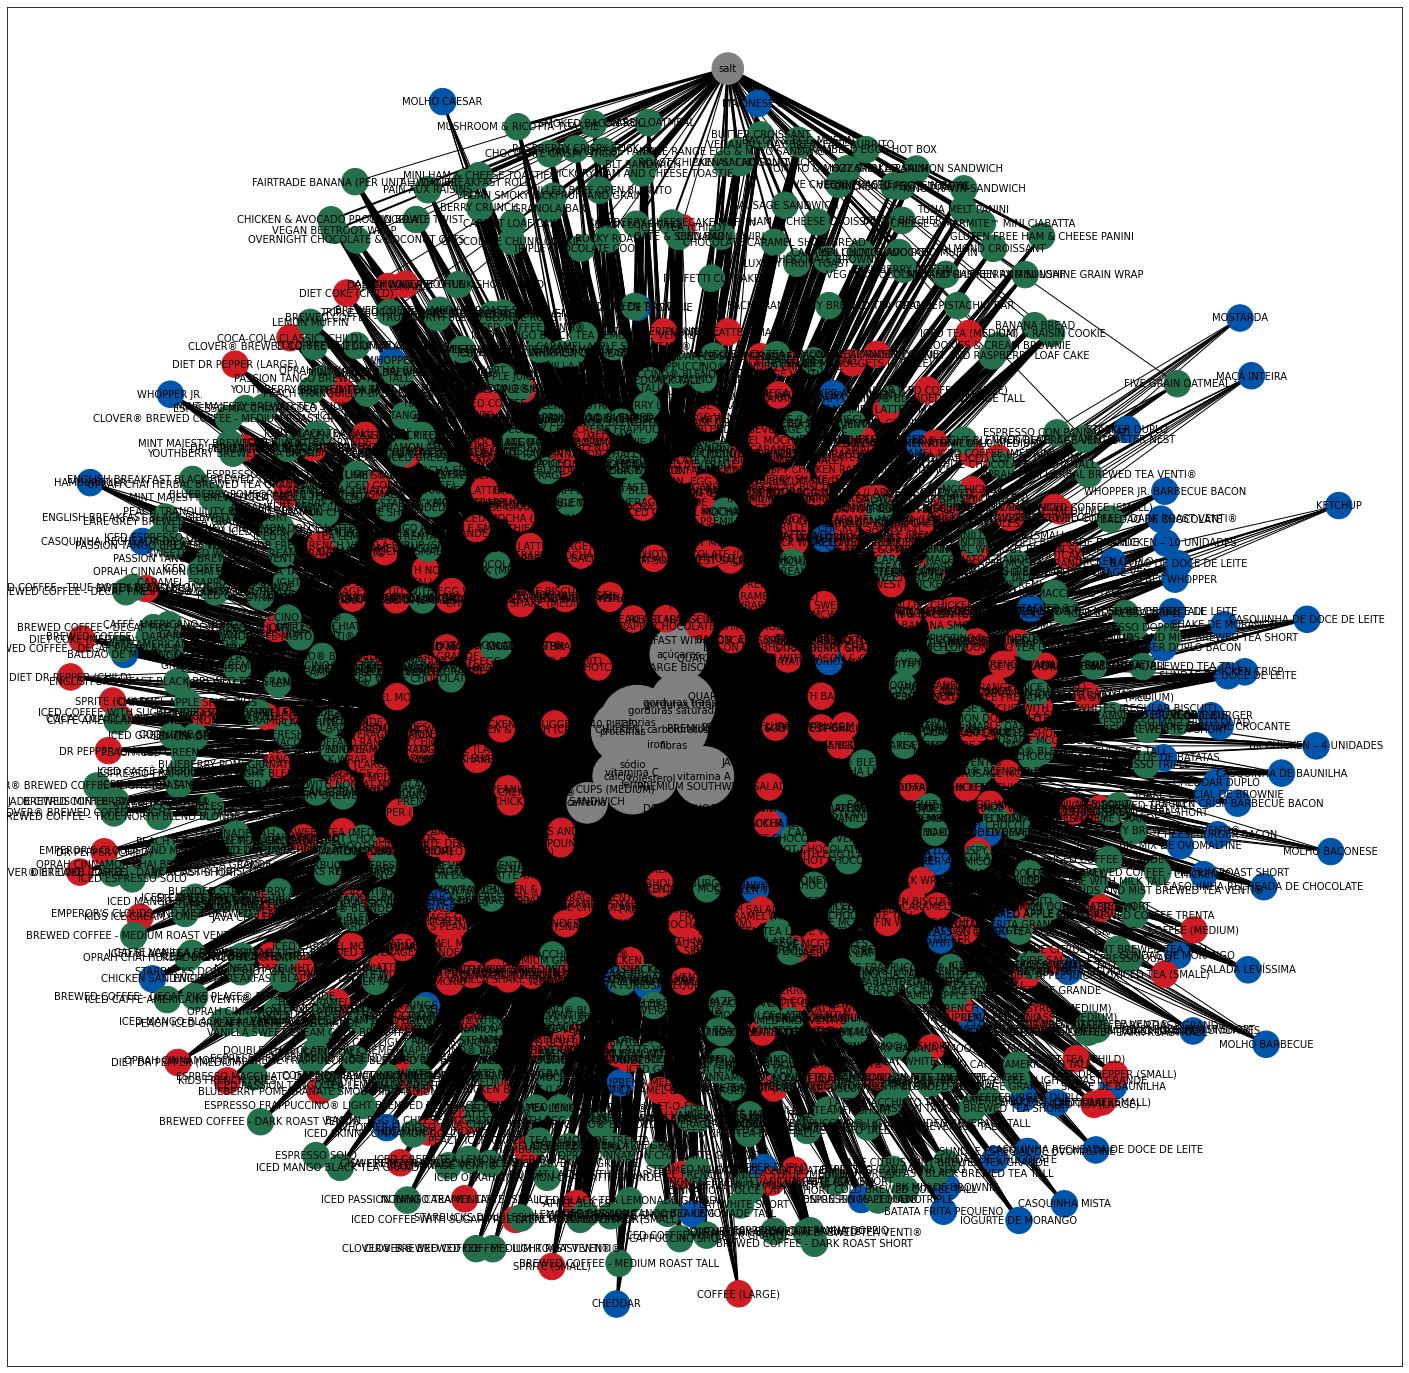

In [9]:
        
fig, ax = plt.subplots(figsize=(25,25))

nx.draw_networkx(fastfood,  
                  arrows=True,
                  with_labels=True,
                  ax=ax,
                  node_size=[nx.get_node_attributes(fastfood,'size')[g] for g in fastfood.nodes()], 
                  node_shape='o',
                  node_color=[nx.get_node_attributes(fastfood,'color')[g] for g in fastfood.nodes()],
                  alpha=1.0,
                  width=list(nx.get_edge_attributes(fastfood,'weight').values()),
                  style='solid',
                  font_size=10,
                  font_color='black',
                  font_weight='normal',
                  font_family='sans-serif')